# K-Nearest Neighbors

Resources:

* [Wikipedia](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)
* [SciKit-Learn](http://scikit-learn.org/stable/modules/neighbors.html)
* [StatSoft Definition](http://www.statsoft.com/textbook/k-nearest-neighbors)

K-Nearest Neighbors Algorithm (aka kNN) can be used for both classification (data with discrete variables) and regression (data with continuous labels). The algorithm functions by calculating the distance (Sci-Kit Learn uses the formula for Euclidean distance but other formulas are available) between instances to create local "neighborhoods". 

 *Euclidean Distance Formula:*
 ![Euclidean_Distance](./img/euc_dist.png "Formula")
 

**K-Nearest Neighbors functions by maximizing the homogeneity amongst instances within a neighborhood while also maximizing the heterogeneity of instances between neighborhoods.** So each member of a given neighborhood “looks like” (has similar variables) all of the other members of that neighborhood. 

One neat feature of the K-Nearest Neighbors algorithm is the number of neighborhoods can be user defined or generated by the algorithm using the local density of points.

The Scikit—Learn Function: ```sklearn.neighbors``` accepts numpy arrays or scipy.sprace matrices are inputs. 

For this implementation I will use the classic 'iris data set' included within scikit-learn as a toy data set. 

# Overview of the Data

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn; 
from sklearn.linear_model import LinearRegression
from scipy import stats
import pylab as pl

seaborn.set()

/Users/ernestt/venv/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
from sklearn.datasets import load_iris
data = load_iris()

print 'Keys:', data.keys()
print '-' * 20
print 'Data Shape:', data.data.shape
print '-' * 20
print 'Features:', data.feature_names
print '-' * 20

Keys: ['target_names', 'data', 'target', 'DESCR', 'feature_names']
--------------------
Data Shape: (150, 4)
--------------------
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
--------------------


# What the hell is a Sepal?
Personally, I had no idea what a sepal was so I looked up some basic flower anatonmy, I found this picture helpful for relating petal and sepal length.

*Flower Anatomy:*
 ![Flower_diagram](./img/flower_anatomy.jpg "Formula")


# Scatter Plots

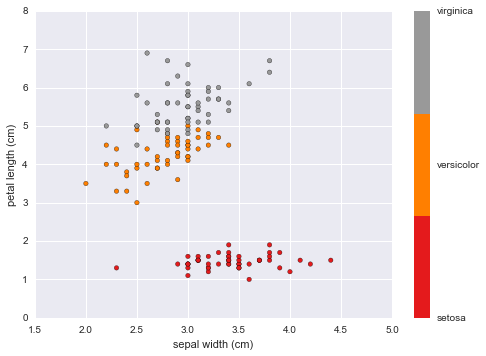

In [3]:
#Petal Length vs Sepal Width
plt.scatter(data.data[:, 1], data.data[:, 2],
            c=data.target, cmap=plt.cm.get_cmap('Set1', 3))
plt.xlabel(data.feature_names[1])
plt.ylabel(data.feature_names[2])

color_bar_formating = plt.FuncFormatter(lambda i, *args: data.target_names[int(i)])
plt.colorbar(ticks = [0,1,2], format = color_bar_formating)

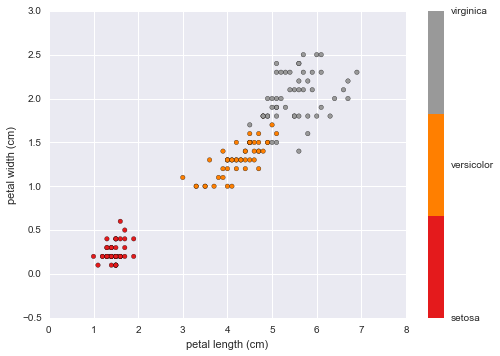

In [4]:
#Petal Length vs Sepal Width
plt.scatter(data.data[:, 2], data.data[:, 3],
            c=data.target, cmap=plt.cm.get_cmap('Set1', 3))
plt.xlabel(data.feature_names[2])
plt.ylabel(data.feature_names[3])

color_bar_formating = plt.FuncFormatter(lambda i, *args: data.target_names[int(i)])
plt.colorbar(ticks = [0,1,2], format = color_bar_formating)

This plot indicates a strong positive correlation between petal length and width for each of the three flower species

# Implementing K-Nearest Neighbors Classifier
In this example we're using kNN as a classifier to identify what species a given flower most likely belongs to, given the following four features (measured in cm): 
* sepal length 
* sepal width 
* petal length 
* petal width

Essentially this is what is happening under the hood:

**1. We use our data to train The kNN Classifier.**
    * This will allow the algorithm to define new neighborhoods.
**2. Once the neighborhoods are defined, our classifier will be able to ingest feature data (petal and sepal measurements) on flowers it has not been trained on and determine which neighborhood it is most homogenous to. **
    * Once the neighborhoods have been defined we can actually use the classifier in a generalizable fashion on new data. 
**3. We can determine the accuracy (and usefulness) of our model by seeing how many flowers it accurately classifies on a testing data set.**
    * In order to do this the actual species must be known.


In [5]:
from sklearn import neighbors, datasets

# where X = measurements and y = species
X, y = data.data, data.target 

#define the model 
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')

#fit/train the new model
knn.fit(X,y)

#What species has a 2cm x 2cm sepal and a 4cm x 2cm petal?
X_pred = [2, 2, 4, 2]
output = knn.predict([X_pred,]) #use the model we just created to predict

print 'Predicted Species:', data.target_names[output]
print 'Options:', data.target_names
print 'Probabilities:', knn.predict_proba([X_pred, ])

Predicted Species: ['versicolor']
Options: ['setosa' 'versicolor' 'virginica']
Probabilities: [[ 0.   0.8  0.2]]


# kNN Decision Boundary Plot
Here's a graphical representation of the classifier we created above. As we can see from this plot, the virgincia species is relatively easier to classify when compared to versicolor and setosa. 

*kNN Plot*
![knn_plot](./img/kNN_plot_final.png "kNN Plot")

# Conclusion
The number of neighbors to implement is highly data-dependent meaning optimal neighborhood sizes will differ greatly between data sets.

**It is important to select a classifier which balances generalizability (percision) and accuracy or we are at risk of overfitting.** For example, if we pick a classifier which fits the data perfectly we will lose the ability to make generalizable inferences from it (this would look like the 'low accuracy', 'high precision' scenario below because our model is very good at predicting training data but misses completely when presented with new data). Best practice is to test multiple classifiers using a testing data set to ensure we're making apropriate trade-offs between accuracy and generalizability. 

We're shooting for high-accuracy and high-precision

 ![Accuracy_Percision](./img/acc_vs_perc.jpg "Accuracy")